In [1]:
from src.data import extract_vault
import matplotlib.pyplot as plt 
import networkx as nx

In [2]:
vault = extract_vault('./skvad_obsidians/DigitalGarden/')

<class 'pandas.core.frame.DataFrame'>
Index: 58 entries, 20-valid-parenthesis to binary-search
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   rel_filepath      57 non-null     object        
 1   abs_filepath      57 non-null     object        
 2   file_exists       58 non-null     object        
 3   n_backlinks       58 non-null     object        
 4   n_wikilinks       57 non-null     float64       
 5   n_tags            57 non-null     float64       
 6   n_embedded_files  57 non-null     float64       
 7   modified_time     57 non-null     datetime64[ns]
 8   graph_category    58 non-null     object        
dtypes: datetime64[ns](1), float64(3), object(5)
memory usage: 4.5+ KB
None


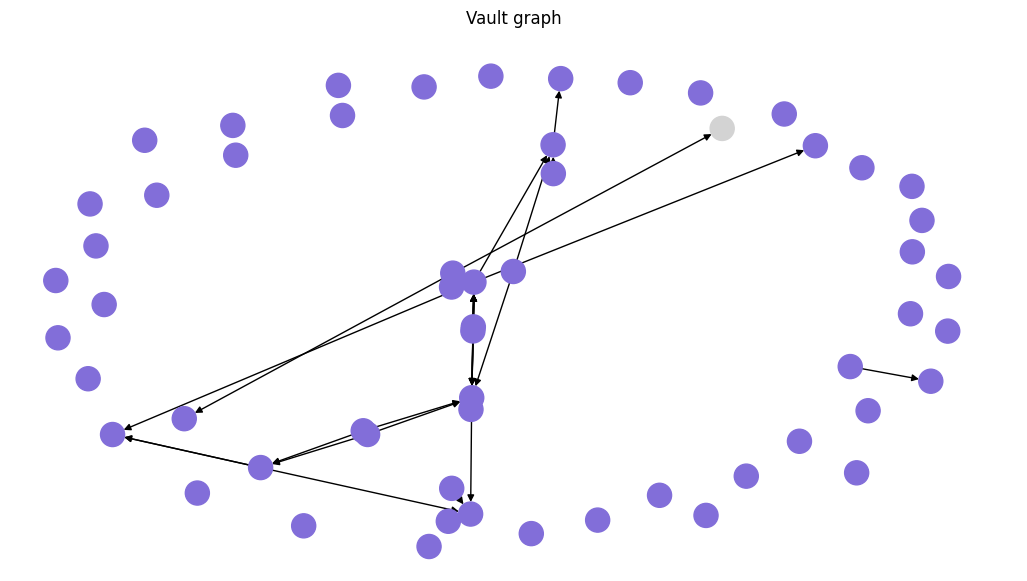

In [3]:
df = vault.get_all_file_metadata()

colour_map = {'note': '#826ED9',
              'nonexistent': '#D3D3D3',
              'attachment': '#D6D470'}
node_colours_lookup = (df['graph_category']
                       .map(colour_map)
                       .to_dict())
node_colours_list = [node_colours_lookup.get(i)
                     for i in vault.graph.nodes()]

fig, ax = plt.subplots(figsize=(13,7))
nx.draw(vault.graph, node_color=node_colours_list, with_labels=False, ax=ax)
ax.set_title('Vault graph')
plt.show()